# Join 3 catalogues of YSO selecting objects in CrA and removing duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

Loading Esplin and Luhman (2023) catalogue

In [3]:
esplin = pd.DataFrame(np.array(Table.read('catalogues/esplin_cata.txt', format='ascii.cds')))

In [4]:
esplin

,2MASS,WISE,Gaia,GP75RCrA,TS84,HBC,WMB97,CrAPMS,P98c,ISOCrA,...,f_W4mag,Exc4.5,Exc8.0,Exc24,ExcW2,ExcW3,ExcW4,DiskType,Ak,f_Ak
0,18204248-3701412,WISEA J182042.48-370141.5,6728162648254144128,0,0,0,0,0,0,0,...,nodet,0,0,0,N,0,0,III,0.02,IR spec
1,18214722-3909565,WISEA J182147.22-390956.8,6726671920967135360,0,0,0,0,0,0,0,...,nodet,0,0,0,N,N,0,III,0.01,IR spec
2,18215513-3718049,WISEA J182155.13-371805.2,6728140520578676480,0,0,0,0,0,0,0,...,0,0,0,0,N,N,Y,debris/ev trans,0.00,J-H
3,18222970-3434131,WISEA J182229.70-343413.6,4044364406781706112,0,0,0,0,0,0,0,...,nodet,0,0,0,N,N,0,III,0.01,J-H
4,18223063-3327291,WISEA J182230.65-332729.3,4044760643280597504,0,0,0,0,0,0,0,...,nodet/unres,0,0,0,N,N,0,III,0.05,J-H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,19045816-3650279,WISEA J190458.15-365028.1,6719208225556239104,0,0,0,0,0,0,0,...,nodet,0,0,0,N,N,0,III,0.10,IR spec
389,19053189-3723054,WISEA J190531.89-372305.6,6719129924007616640,0,0,0,0,0,0,0,...,nodet,N,0,0,N,N,0,III,0.00,J-H
390,19055673-3611464,WISEA J190556.74-361146.6,6719333608539318144,0,0,0,0,0,0,0,...,off,0,0,0,N,N,N,III,0.04,J-H
391,19094592-3704261,WISEA J190945.92-370426.4,6719035052475592576,0,0,0,0,0,0,0,...,0,0,0,0,Y,Y,Y,full,0.23,J-H


Loading Manara et al. (2023) catalogue (PPVII chapter)

In [5]:
ppvii = pd.read_csv('catalogues/pp7_cata.tsv', delimiter='\t')
ppvii = ppvii[ppvii.Region=='CrA']

In [6]:
ppvii

,Region,Source,2MASS/SSTc2d,RA,Dec,EDR3_plx,EDR3_err_plx,EDR3_dist_pc,EDR3_RUWE,EDR3_Dist_PPVII,...,Mstar_B15_xs_DR3,logMacc_B15_xs_DR3,Mstar_S00_xs_DR3,logMacc_S00_xs_DR3,Mstar_Fei_xs_DR3,logMacc_Fei_xs_DR3,Mstar_PPVII,logMacc_PPVII,notes_Macc_PPVII,dist_PPVII
843,CrA,CrA-1,J18563974-3707205,18:56:39.760,-37:07:20.800,6.6642,0.0545,150.06,1.392,150.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,--,NaN
844,CrA,CrA-3,J18594391-3704000,18:59:43.920,-37:04:01.100,--,--,--,--,156.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.0000,-99.00,--,NaN
845,CrA,CrA-4,J18595094-3706313,18:59:50.950,-37:06:31.600,6.3580,0.2367,157.28,1.078,157.28,...,0.036,-105.1,NaN,NaN,NaN,NaN,0.0360,-105.10,--,NaN
846,CrA,CrA-6,J19002906-3656036,19:00:29.070,-36:56:03.800,6.3111,0.1401,158.45,5.876,156.00,...,NaN,NaN,0.1975,-105.4,NaN,NaN,0.1975,-105.40,--,NaN
847,CrA,CrA-8,J19004530-3711480,19:00:45.310,-37:11:48.200,6.1432,0.1639,162.78,1.062,162.78,...,0.045,-105.2,NaN,NaN,NaN,NaN,0.0450,-105.20,--,NaN
848,CrA,CrA-9,J19005804-3645048,19:00:58.050,-36:45:05.000,6.3957,0.0189,156.36,1.348,156.36,...,0.464,-105.8,0.4825,-105.8,0.45,-105.79,0.4640,-105.80,--,NaN
849,CrA,CrA-10,J19005974-3647109,19:00:59.750,-36:47:11.200,6.5886,0.1930,151.78,0.994,151.78,...,0.113,-105.7,0.1050,-105.7,0.11,-105.72,0.1130,-105.70,--,NaN
850,CrA,CrA-12,J19011629-3656282,19:01:16.290,-36:56:28.300,6.5181,0.0731,153.42,1.033,153.42,...,0.058,-105.3,NaN,NaN,NaN,NaN,0.0580,-105.30,--,NaN
851,CrA,CrA-13,J19011893-3658282,19:01:18.950,-36:58:28.400,6.6078,0.1240,151.34,0.992,151.34,...,0.376,-105.8,0.3799,-105.8,0.40,-105.87,0.3760,-105.80,--,NaN
852,CrA,CrA-15,J19013232-3658030,19:01:32.310,-36:58:03.000,--,--,--,--,156.00,...,0.212,-105.6,0.2325,-105.6,0.21,-105.65,0.2120,-105.60,--,NaN


Loading Marton+Dunham catalogue (already joined in Gupta et al., 2023)

In [7]:
marduh = pd.read_cv('catalogues/Marton+Dunham.csv')

In [8]:
marduh

,ra,dec,Name,alpha0,alpha,dunham_alpha,source,source_id
111971,282.200455,-36.282344,J184848.10-361656.4,-0.664445,-0.354445,False,marton16,111971
111972,282.094473,-36.670627,J184822.67-364014.2,-1.543820,-1.233820,False,marton16,111972
116462,282.076205,-37.184358,J184818.28-371103.6,-1.776548,-1.466548,False,marton16,116462
120933,285.480202,-37.394744,J190155.24-372341.0,-0.794506,-0.484506,False,marton16,120933
120934,285.188823,-37.196775,J190045.31-371148.3,-1.320000,-0.900000,True,marton16,120934
...,...,...,...,...,...,...,...,...
135354,285.778333,-37.213611,J190306.8-371249,-0.220000,0.360000,True,dunham15,1719
135355,285.420000,-36.875833,J190140.8-365233,-1.680000,-0.760000,True,dunham15,1720
135356,285.460833,-36.969167,J190150.6-365809,0.960000,0.920000,True,dunham15,1721
135357,285.480417,-36.955833,J190155.3-365721,2.470000,2.640000,True,dunham15,1723


Preparing new catalogue

In [9]:
catalogue = pd.DataFrame({'ra':[], 'dec':[], 'ppvii_f':[], 'esplin_f':[], 'dunhmart_f':[], 'ppvii_i':[], 'esplin_i':[], 'dunhmart_i':[]})

In [10]:
catalogue

,ra,dec,ppvii_f,esplin_f,dunhmart_f,ppvii_i,esplin_i,dunhmart_i


### Merging Manara et al. (2023) with Marton+Dunham
using a threshold of 1 arcsec to determine if 2 yso are the same

In [11]:
threshold = 1*u.arcsec #arcsec

In [13]:
coordppvii = SkyCoord(ppvii.RA, ppvii.Dec, frame='icrs', unit=(u.hourangle, u.deg))
coordmarduh = SkyCoord(marduh.ra, marduh.dec, frame='fk5', unit=u.deg)
idx, d2d, d3d = coordmarduh.match_to_catalog_sky(coordppvii)

Text(0.5, 0, 'distance of closer star [arcsec]')

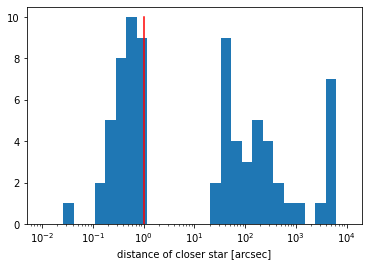

In [14]:
plt.hist(d2d.arcsec, bins=np.logspace(-2,4,30))
plt.xscale('log')
plt.plot([threshold/u.arcsec, threshold/u.arcsec], [0,10], color='red')
plt.xlabel('distance of closer star [arcsec]')

In [15]:
same = d2d<threshold
notsame = ~(d2d<threshold)

In [16]:
# inserting the conneley+dunham catalogue
catalogue['ra'] = marduh['ra']
catalogue['dec'] = marduh['dec']
catalogue['dunhmart_f'] = True
catalogue['ppvii_f'] = False
catalogue['esplin_f'] = False
catalogue['dunhmart_i'] = marduh.index
catalogue.reset_index(inplace=True, drop=True)

In [17]:
catalogue

,ra,dec,ppvii_f,esplin_f,dunhmart_f,ppvii_i,esplin_i,dunhmart_i
0,282.200455,-36.282344,False,False,True,NaN,NaN,111971
1,282.094473,-36.670627,False,False,True,NaN,NaN,111972
2,282.076205,-37.184358,False,False,True,NaN,NaN,116462
3,285.480202,-37.394744,False,False,True,NaN,NaN,120933
4,285.188823,-37.196775,False,False,True,NaN,NaN,120934
...,...,...,...,...,...,...,...,...
70,285.778333,-37.213611,False,False,True,NaN,NaN,135354
71,285.420000,-36.875833,False,False,True,NaN,NaN,135355
72,285.460833,-36.969167,False,False,True,NaN,NaN,135356
73,285.480417,-36.955833,False,False,True,NaN,NaN,135357


In [18]:
#adding flags to ppvii objects in dunham
catalogue.loc[same,'ppvii_f']=True
catalogue.loc[same, 'ppvii_i']=ppvii.iloc[idx[same]].index

In [19]:
catalogue

,ra,dec,ppvii_f,esplin_f,dunhmart_f,ppvii_i,esplin_i,dunhmart_i
0,282.200455,-36.282344,False,False,True,NaN,NaN,111971
1,282.094473,-36.670627,False,False,True,NaN,NaN,111972
2,282.076205,-37.184358,False,False,True,NaN,NaN,116462
3,285.480202,-37.394744,True,False,True,876.0,NaN,120933
4,285.188823,-37.196775,True,False,True,847.0,NaN,120934
...,...,...,...,...,...,...,...,...
70,285.778333,-37.213611,False,False,True,NaN,NaN,135354
71,285.420000,-36.875833,True,False,True,881.0,NaN,135355
72,285.460833,-36.969167,False,False,True,NaN,NaN,135356
73,285.480417,-36.955833,False,False,True,NaN,NaN,135357


In [20]:
#ppvii objects not in connduham
ppvii_new = ppvii[[i not in ppvii.iloc[idx[same]].index for i in ppvii.index]] 

In [21]:
ppvii_new

,Region,Source,2MASS/SSTc2d,RA,Dec,EDR3_plx,EDR3_err_plx,EDR3_dist_pc,EDR3_RUWE,EDR3_Dist_PPVII,...,Mstar_B15_xs_DR3,logMacc_B15_xs_DR3,Mstar_S00_xs_DR3,logMacc_S00_xs_DR3,Mstar_Fei_xs_DR3,logMacc_Fei_xs_DR3,Mstar_PPVII,logMacc_PPVII,notes_Macc_PPVII,dist_PPVII
844,CrA,CrA-3,J18594391-3704000,18:59:43.920,-37:04:01.100,--,--,--,--,156.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.0000,-99.0,--,NaN
846,CrA,CrA-6,J19002906-3656036,19:00:29.070,-36:56:03.800,6.3111,0.1401,158.45,5.876,156.00,...,NaN,NaN,0.1975,-105.4,NaN,NaN,0.1975,-105.4,--,NaN
850,CrA,CrA-12,J19011629-3656282,19:01:16.290,-36:56:28.300,6.5181,0.0731,153.42,1.033,153.42,...,0.058,-105.3,NaN,NaN,NaN,NaN,0.0580,-105.3,--,NaN
856,CrA,CrA-22,J19015180-3710478,19:01:51.860,-37:10:44.700,6.4312,0.5257,155.49,1.064,155.49,...,0.097,-105.3,0.1000,-105.3,0.09,-105.30,0.0970,-105.3,--,NaN
857,CrA,CrA-23,J19015374-3700339,19:01:53.750,-37:00:33.900,6.2791,0.2256,159.26,1.144,159.26,...,0.029,-105.3,NaN,NaN,NaN,NaN,0.0290,-105.3,--,NaN
868,CrA,CrA-42,J19015037-3656390,19:01:50.480,-36:56:38.400,--,--,--,--,156.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.0000,-99.0,--,NaN
870,CrA,CrA-46,J18555629-3700066,18:55:56.320,-37:00:07.100,--,--,--,--,156.00,...,-99.000,--,-99.0000,--,-99.00,-99.00,-99.0000,-99.0,--,NaN
871,CrA,CrA-47,J18564024-3655203,18:56:40.280,-36:55:20.800,6.8098,0.0976,146.85,1.061,146.85,...,0.036,-105.4,NaN,NaN,NaN,NaN,0.0360,-105.4,--,NaN
872,CrA,CrA-48,J18570785-3654041,18:57:07.860,-36:54:04.400,6.5778,0.1495,152.03,1.157,152.03,...,0.050,-105.5,NaN,NaN,NaN,NaN,0.0500,-105.5,--,NaN
875,CrA,CrA-54,J19013912-3653292,19:01:39.150,-36:53:29.400,6.3991,0.0415,156.27,1.178,156.27,...,NaN,NaN,0.7250,-105.5,NaN,NaN,0.7250,-105.5,--,NaN


In [22]:
i = 0
ra = []
dec = []
ids = []
for j, row in ppvii.iterrows():
    if i not in idx[same]:
        ra.append(coordppvii[i].transform_to('fk5').ra.deg)
        dec.append(coordppvii[i].transform_to('fk5').dec.deg)
        ids.append(j)
    i+=1
add_cat = pd.DataFrame({
    'ra': ra,
    'dec': dec,
    'ppvii_i': ids,
})
add_cat['ppvii_f'] = True
add_cat['dunhmart_f'] = False
add_cat['esplin_f'] = False
add_cat.index = range(len(catalogue), len(catalogue)+len(ids))

In [23]:
add_cat

,ra,dec,ppvii_i,ppvii_f,dunhmart_f,esplin_f
75,284.933007,-37.066966,844,True,False,False
76,285.121132,-36.934383,846,True,False,False
77,285.317882,-36.941188,850,True,False,False
78,285.466090,-37.179077,856,True,False,False
79,285.473965,-37.009411,857,True,False,False
80,285.460340,-36.943994,868,True,False,False
81,283.984674,-37.001966,870,True,False,False
82,284.167841,-36.922438,871,True,False,False
83,284.282757,-36.901216,872,True,False,False
84,285.413132,-36.891494,875,True,False,False


In [24]:
# join
catalogue = pd.concat([catalogue, add_cat])

In [25]:
catalogue

,ra,dec,ppvii_f,esplin_f,dunhmart_f,ppvii_i,esplin_i,dunhmart_i
0,282.200455,-36.282344,False,False,True,NaN,NaN,111971.0
1,282.094473,-36.670627,False,False,True,NaN,NaN,111972.0
2,282.076205,-37.184358,False,False,True,NaN,NaN,116462.0
3,285.480202,-37.394744,True,False,True,876.0,NaN,120933.0
4,285.188823,-37.196775,True,False,True,847.0,NaN,120934.0
...,...,...,...,...,...,...,...,...
89,285.465590,-36.920605,True,False,False,886.0,NaN,NaN
90,285.389840,-37.008411,True,False,False,887.0,NaN,NaN
91,285.493007,-37.018327,True,False,False,888.0,NaN,NaN
92,285.285924,-36.955633,True,False,False,889.0,NaN,NaN


### Joining with Esplin and Luhman (2023)

In [26]:
coord_merged = SkyCoord(catalogue.ra, catalogue.dec, frame='fk5', unit=u.deg)
coord_esplin = SkyCoord(esplin.RAdeg, esplin.DEdeg, frame='icrs', unit=u.deg)

In [27]:
idx, d2d, d3d = coord_merged.match_to_catalog_sky(coord_esplin)

Text(0.5, 0, 'distance of closer star [arcsec]')

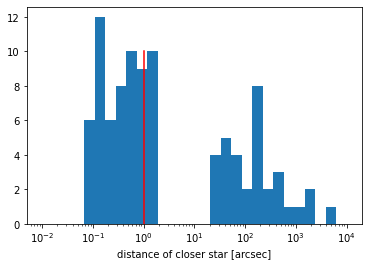

In [28]:
plt.hist(d2d.arcsec, bins=np.logspace(-2,4,30))
plt.xscale('log')
plt.plot([threshold/u.arcsec, threshold/u.arcsec], [0,10], color='red')
plt.xlabel('distance of closer star [arcsec]')

In [29]:
same = d2d<threshold
notsame = ~(d2d<threshold)

In [30]:
#adding esplin flag to catalogue
catalogue.loc[same,'esplin_f']=True
catalogue.loc[same, 'esplin_i']=esplin.iloc[idx[same]].index

In [31]:
i = 0
ra = []
dec = []
ids = []
for j, row in esplin.iterrows():
    if i not in idx[same]:
        ra.append(coord_esplin[i].transform_to('fk5').ra.deg)
        dec.append(coord_esplin[i].transform_to('fk5').dec.deg)
        ids.append(j)
    i+=1
add_cat = pd.DataFrame({
    'ra': ra,
    'dec': dec,
    'esplin_i': ids,
})
add_cat['esplin_f'] = True
add_cat['dunhmart_f'] = False
add_cat['ppvii_f'] = False
add_cat.index = range(len(catalogue), len(catalogue)+len(ids))

In [32]:
add_cat

,ra,dec,esplin_i,esplin_f,dunhmart_f,ppvii_f
94,275.177007,-37.028217,0,True,False,False
95,275.446795,-39.165831,1,True,False,False
96,275.479733,-37.301482,2,True,False,False
97,275.623792,-34.570458,3,True,False,False
98,275.627655,-33.458213,4,True,False,False
...,...,...,...,...,...,...
441,286.041765,-36.767990,385,True,False,False
442,286.185094,-36.844821,387,True,False,False
443,286.242352,-36.841174,388,True,False,False
444,286.382927,-37.384943,389,True,False,False


In [33]:
#join 
catalogue = pd.concat([catalogue, add_cat])

### Final catalogue

In [34]:
catalogue

,ra,dec,ppvii_f,esplin_f,dunhmart_f,ppvii_i,esplin_i,dunhmart_i
0,282.200455,-36.282344,False,False,True,NaN,NaN,111971.0
1,282.094473,-36.670627,False,False,True,NaN,NaN,111972.0
2,282.076205,-37.184358,False,True,True,NaN,206.0,116462.0
3,285.480202,-37.394744,True,True,True,876.0,345.0,120933.0
4,285.188823,-37.196775,True,True,True,847.0,295.0,120934.0
...,...,...,...,...,...,...,...,...
441,286.041765,-36.767990,False,True,False,NaN,385.0,NaN
442,286.185094,-36.844821,False,True,False,NaN,387.0,NaN
443,286.242352,-36.841174,False,True,False,NaN,388.0,NaN
444,286.382927,-37.384943,False,True,False,NaN,389.0,NaN


In [36]:
l1 = len(catalogue[catalogue.esplin_f & ~catalogue.ppvii_f & ~catalogue.dunhmart_f])
l2 = len(catalogue[~catalogue.esplin_f & catalogue.ppvii_f & ~catalogue.dunhmart_f])
l3 = len(catalogue[catalogue.esplin_f & catalogue.ppvii_f & ~catalogue.dunhmart_f])
l4 = len(catalogue[~catalogue.esplin_f & ~catalogue.ppvii_f & catalogue.dunhmart_f])
l5 = len(catalogue[catalogue.esplin_f & ~catalogue.ppvii_f & catalogue.dunhmart_f])
l6 = len(catalogue[~catalogue.esplin_f & catalogue.ppvii_f & catalogue.dunhmart_f])
l7 = len(catalogue[catalogue.esplin_f & catalogue.ppvii_f & catalogue.dunhmart_f])

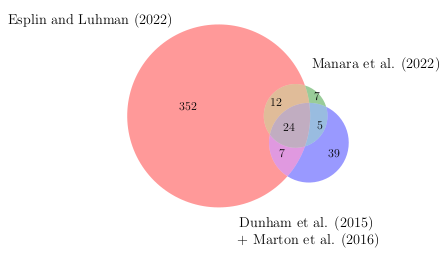

In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

# Use the venn2 function
venn3(subsets = (l1,l2,l3,l4,l5,l6,l7), set_labels = ('Esplin and Luhman (2022)', 'Manara et al. (2022)\n', '\n\nDunham et al. (2015) \n+ Marton et al. (2016)'))
plt.savefig('venn.png', dpi=500, bbox_inches='tight')

In [38]:
catalogue.to_csv('catalogues/merged_complete.csv')